In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import math
from enum import Enum
import os
# from plotly.express import line
#import data
#import plotly.express as px
# %matplotlib inline 
sns.set(style="ticks")
plt.style.use('ggplot')
pd.set_option('display.max_columns',24)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [252]:
encoding = 'windows-1250'
data=pd.read_csv(r'C:\Users\Dima\Desktop\Homework\3 курс\ТМО\ЛР5\melb_data.csv', encoding = encoding)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [253]:
# data = data.drop(columns='Suburb')
# data = data.drop(columns='Address')
# data = data.drop(columns='Type')
# data = data.drop(columns='Method')
# data = data.drop(columns='SellerG')
# data = data.drop(columns='Date')
# data = data.drop(columns='CouncilArea')
# data = data.drop(columns='Regionname')

In [254]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.0000,13580.0000,13580.0000,13580.0000,13580.0000,13580.0000,13518.0000,13580.0000,7130.0000,8205.0000,13580.0000,13580.0000,13580.0000
mean,2.9380,1075684.0795,10.1378,3105.3019,2.9147,1.5342,1.6101,558.4161,151.9676,1964.6842,-37.8092,144.9952,7454.4174
std,0.9557,639310.7243,5.8687,90.6770,0.9659,0.6917,0.9626,3990.6692,541.0145,37.2738,0.0793,0.1039,4378.5818
min,1.0000,85000.0000,0.0000,3000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1196.0000,-38.1825,144.4318,249.0000
25%,2.0000,650000.0000,6.1000,3044.0000,2.0000,1.0000,1.0000,177.0000,93.0000,1940.0000,-37.8568,144.9296,4380.0000
50%,3.0000,903000.0000,9.2000,3084.0000,3.0000,1.0000,2.0000,440.0000,126.0000,1970.0000,-37.8024,145.0001,6555.0000
75%,3.0000,1330000.0000,13.0000,3148.0000,3.0000,2.0000,2.0000,651.0000,174.0000,1999.0000,-37.7564,145.0583,10331.0000
max,10.0000,9000000.0000,48.1000,3977.0000,20.0000,8.0000,10.0000,433014.0000,44515.0000,2018.0000,-37.4085,145.5264,21650.0000


In [255]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [256]:
type_mapping = {
    "h": "house",
    "u": "unit",
    "t": "townhouse"
}

# Map the values in the "Type" column
data["Type"] = data["Type"].map(type_mapping)

In [257]:
method = { "S": "sold",
          "SP" : "sold prior",
          "PI" : "passed in",
          "VB" : "vendor bid"}
data['Method'] = data['Method'].map(method)

In [258]:
null_columns = data.columns[data.isnull().any()]
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method             92
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [259]:
null_columns

Index(['Method', 'Car', 'BuildingArea', 'YearBuilt', 'CouncilArea'], dtype='object')

In [260]:
# Удаление строк с пропущенными значениями в столбцах "Method" и "Car"
data.dropna(subset=["Method", "Car"], inplace=True)
# data.dropna(subset=["Car"], inplace=True)


In [261]:
# Заполнение пропущенных значений в столбцах "BuildingArea", "YearBuilt" и "CouncilArea"
# Для числовых столбцов можно использовать медиану
median_BuildingArea = data["BuildingArea"].median()
median_YearBuilt = data["YearBuilt"].median()
# Для категориального столбца можно использовать наиболее часто встречающееся значение
mode_CouncilArea = data["CouncilArea"].mode()[0]

data["BuildingArea"].fillna(median_BuildingArea, inplace=True)
data["YearBuilt"].fillna(median_YearBuilt, inplace=True)
data["CouncilArea"].fillna(mode_CouncilArea, inplace=True)


array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>],
       [<Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

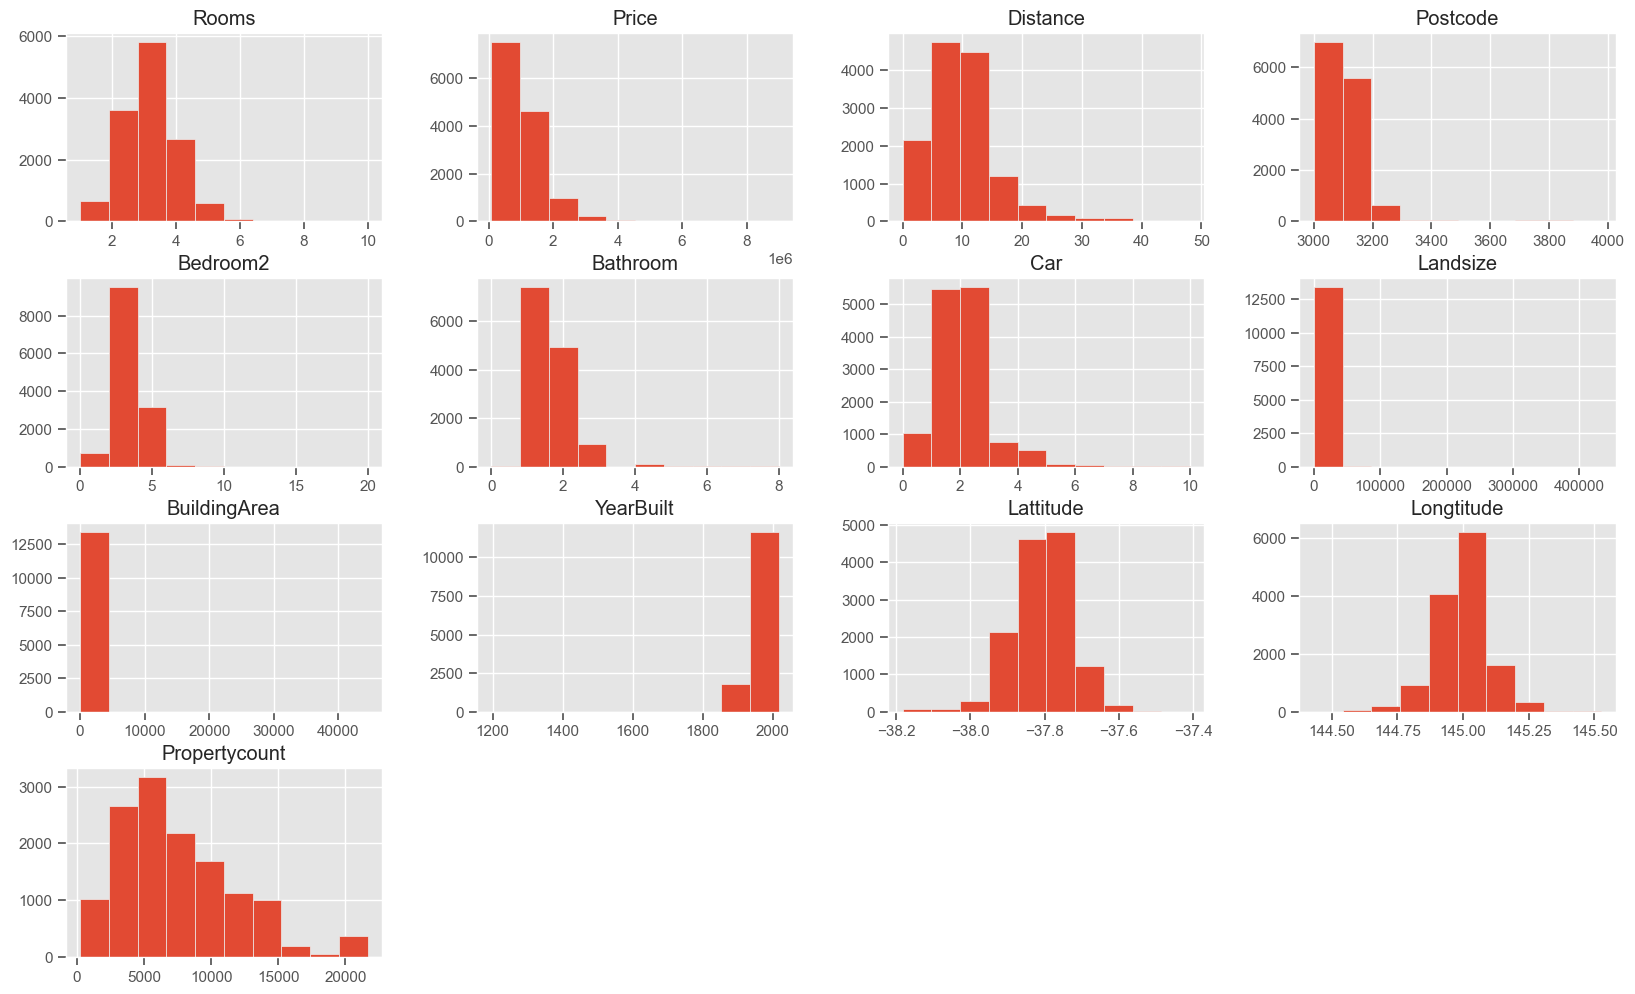

In [262]:
data.hist(bins = 10,figsize=(20,12),grid=True)

In [263]:
# g = sns.FacetGrid(data,col='Type',row='Regionname')
# g.map_dataframe(sns.scatterplot,"Propertycount","Price")

### Распределение цен и количества объектов недвижимости для разных типов домов


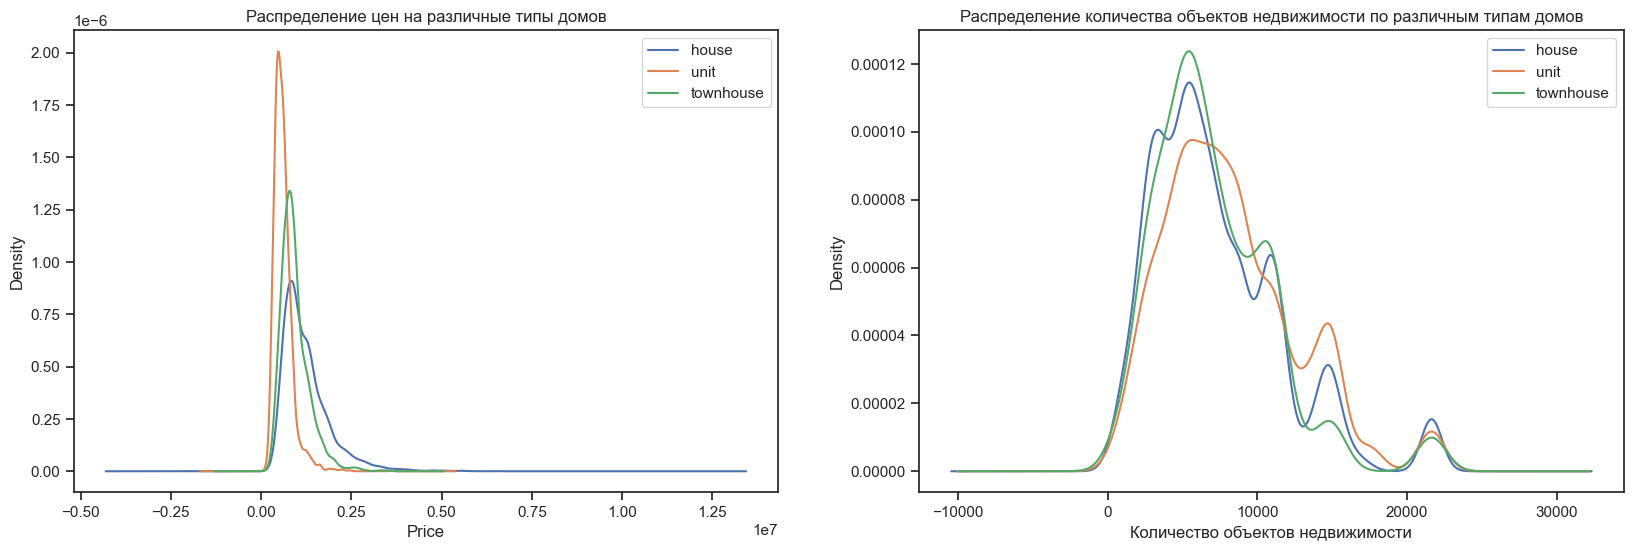

In [297]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
data.Price[data.Type == 'house'].plot(kind='kde')
data.Price[data.Type == 'unit'].plot(kind='kde')
data.Price[data.Type == 'townhouse'].plot(kind='kde')
plt.xlabel('Price')
plt.title('Распределение цен на различные типы домов')
plt.legend(('house','unit','townhouse'),loc='best')
plt.subplot(1,2,2)
data.Propertycount[data.Type == 'house'].plot(kind='kde')
data.Propertycount[data.Type == 'unit'].plot(kind='kde')
data.Propertycount[data.Type == 'townhouse'].plot(kind='kde')
plt.xlabel('Количество объектов недвижимости')
plt.title('Распределение количества объектов недвижимости по различным типам домов')
plt.legend(('house','unit','townhouse'),loc='best')

In [265]:
from sklearn.model_selection import train_test_split

# Определение признаков и целевой переменной
X = data.drop(columns=["Price"])  # Признаки (все столбцы кроме "Price")
y = data["Price"]  # Целевая переменная (столбец "Price")

# Разделение выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Вывод размеров обучающей и тестовой выборок
print("Размер обучающей выборки:", X_train.shape[0])
print("Размер тестовой выборки:", X_test.shape[0])


Размер обучающей выборки: 10741
Размер тестовой выборки: 2686


# Асамблевые модели

In [266]:
from typing import Dict, Tuple
from scipy import stats
from io import StringIO 
from IPython.display import Image
# from sklearn.datasets import load_iris, load_boston
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline 
sns.set(style="ticks")

In [267]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


# def plot_cl(clf):
#     title = clf.__repr__
#     clf.fit(iris_X, iris_y)
#     fig, ax = plt.subplots(figsize=(5,5))
#     X0, X1 = iris_X[:, 0], iris_X[:, 1]
#     xx, yy = make_meshgrid(X0, X1)
#     plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
#     ax.scatter(X0, X1, c=iris_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel('Sepal length')
#     ax.set_ylabel('Sepal width')
#     ax.set_xticks(())
#     ax.set_yticks(())
#     ax.set_title(title)
#     plt.show()

In [268]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(10,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

In [269]:
import pydotplus

In [270]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

In [271]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [272]:
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [273]:
# Определение признаков (X) и целевой переменной (y)
X = data.drop(columns=["Price"])  # Все признаки, кроме Price
y = data["Price"]  # Целевая переменная

In [274]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Drop non-numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
X = data[numeric_columns]
y = data["Price"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the model
br1 = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=5, random_state=10)
br1.fit(X_train, y_train)

# Evaluate the model
train_score = br1.score(X_train, y_train)
test_score = br1.score(X_test, y_test)

print("Train R^2 Score:", train_score)
print("Test R^2 Score:", test_score)


Train R^2 Score: 0.9999483531917832
Test R^2 Score: 0.9957383722817251


In [275]:
# Получение информации о выбранных образцах для каждого дерева
for i, samples in enumerate(br1.estimators_samples_):
    print(f"Дерево {i+1}: {len(samples)} образцов")


Дерево 1: 10741 образцов
Дерево 2: 10741 образцов
Дерево 3: 10741 образцов
Дерево 4: 10741 образцов
Дерево 5: 10741 образцов


In [276]:
tree_samples = [samples for samples in br1.estimators_samples_]
print(tree_samples)


[array([1445, 7817, 3508, ..., 1063, 4443, 3428]), array([ 7775,  8151,   814, ..., 10567,  5495,  9989]), array([9625, 2043,  643, ..., 6133, 5043, 2057]), array([5224, 5086, 8463, ..., 3037, 3489, 7962]), array([ 4752,  1806,  6065, ..., 10657, 10028,  3313])]


In [277]:
# Сконвертируем эти данные в двоичную матрицу, 
# 1 соответствует элементам, попавшим в обучающую выборку
bin_array = np.zeros((5, X.shape[0]))
for i in range(5):
    for j in br1.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

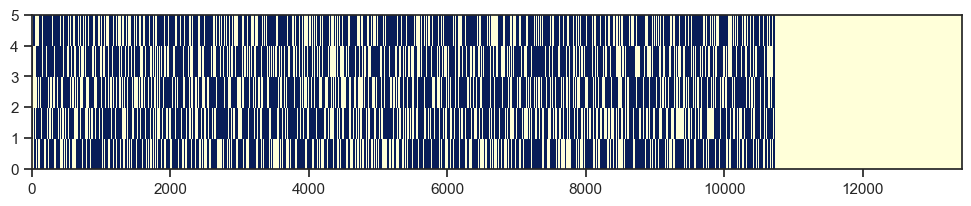

In [278]:
# И визуализируем (синим цветом показаны данные, которые попали в обучающую выборку)
fig, ax = plt.subplots(figsize=(12,2))
ax.pcolor(bin_array, cmap='YlGnBu')
plt.show()

In [279]:
# Оценим Out-of-bag error, теоретическое значение 37%
for i in range(5):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели № {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))

Для модели № 1 размер OOB составляет 49.21%
Для модели № 2 размер OOB составляет 49.1%
Для модели № 3 размер OOB составляет 49.55%
Для модели № 4 размер OOB составляет 49.3%
Для модели № 5 размер OOB составляет 49.09%


In [280]:
from sklearn.metrics import mean_squared_error

# Получаем прогнозы модели для всех образцов
y_pred_all = br1.predict(X)

# Вычисляем MSE для всех образцов
mse = mean_squared_error(y, y_pred_all)

print("Mean Squared Error:", mse)


Mean Squared Error: 381886669.61465704


In [281]:
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# # Визуализация каждого дерева в бэггинге
# for i, estimator in enumerate(br1.estimators_):
#     plt.figure(figsize=(10, 10))
#     plot_tree(estimator, filled=True, rounded=True, feature_names=X.columns)
#     plt.show()


In [282]:
# Вывод структуры каждого дерева
for i, estimator in enumerate(br1.estimators_):
    print(f"Дерево {i+1}:\n{estimator.tree_}\n")


Дерево 1:

Дерево 2:

Дерево 3:

Дерево 4:

Дерево 5:



In [283]:
import pydotplus
from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image
import dtreeviz

In [284]:
# from sklearn.tree import plot_tree

# # Получение первого дерева из ансамбля BaggingRegressor
# bagging_tree = br1.estimators_[0]

# # Визуализация первого дерева
# plt.figure(figsize=(20,10))
# plot_tree(bagging_tree, filled=True, feature_names=X.columns)
# plt.show()


## Случайный лес


In [285]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

# Случайный лес
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Важность признаков

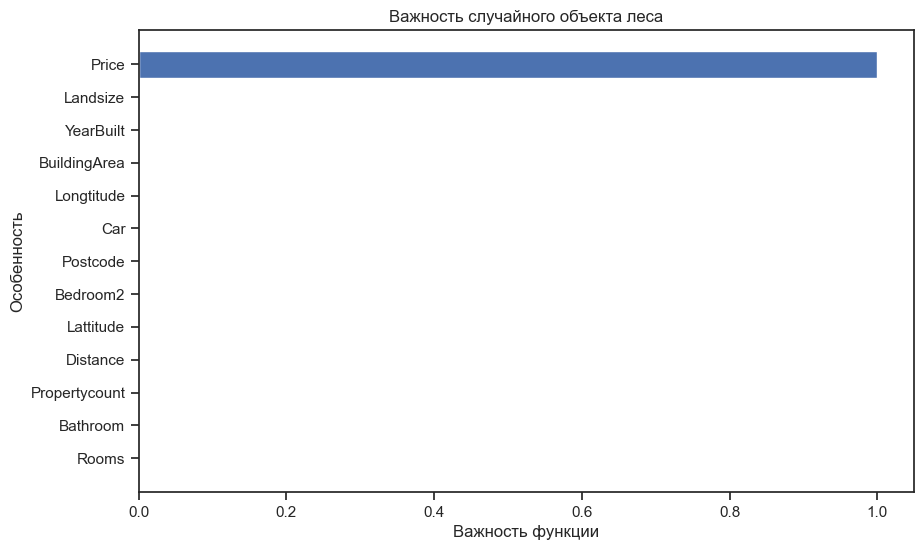

In [286]:
def plot_feature_importances(model, feature_names):
    feature_importances = model.feature_importances_
    sorted_indices = feature_importances.argsort()
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
    plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
    plt.xlabel('Важность функции')
    plt.ylabel('Особенность')
    plt.title('Важность случайного объекта леса')
    plt.show()

plot_feature_importances(rf_model, X.columns)


Прогнозирование


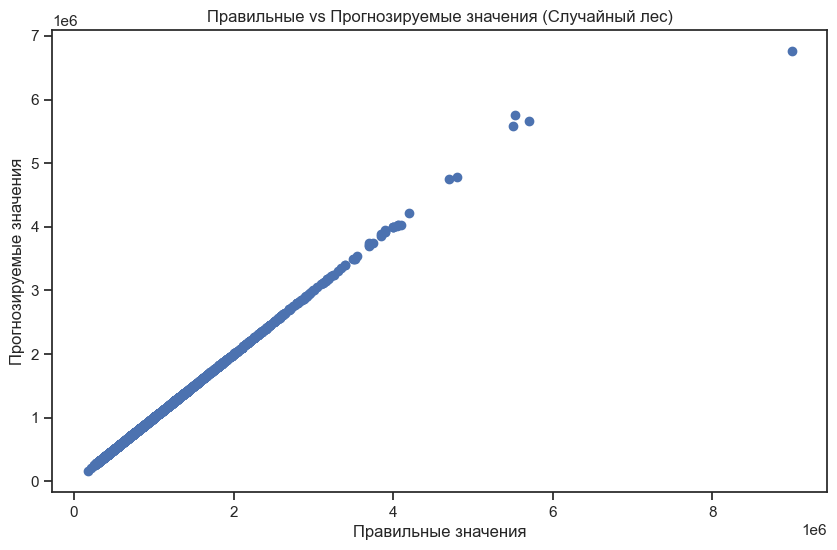

In [287]:
y_pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Правильные значения')
plt.ylabel('Прогнозируемые значения')
plt.title('Правильные vs Прогнозируемые значения (Случайный лес)')
plt.show()


Ошибки прогнозирования

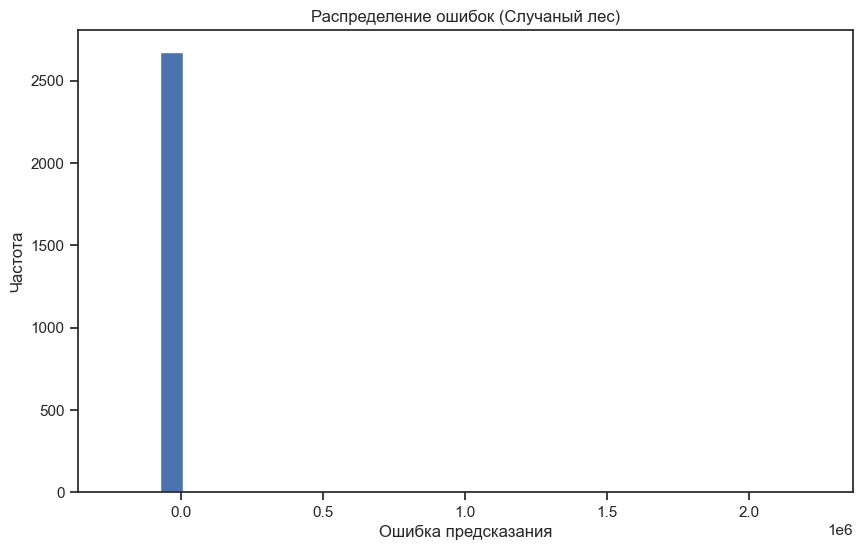

In [288]:
errors_rf = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
plt.hist(errors_rf, bins=30)
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок (Случаный лес)')
plt.show()


In [289]:
# from sklearn.tree import plot_tree

# # Получение первого дерева из ансамбля случайного леса
# random_forest_tree = rf_model.estimators_[0]

# # Визуализация первого дерева
# plt.figure(figsize=(20,10))
# plot_tree(random_forest_tree, filled=True, feature_names=X.columns)
# plt.show()


### Ансамблевая модель: AdaBoost

In [290]:
from sklearn.ensemble import AdaBoostRegressor

# Создание и обучение модели AdaBoost
adaboost_model = AdaBoostRegressor(n_estimators=300, random_state=42)
adaboost_model.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=300, random_state=42)

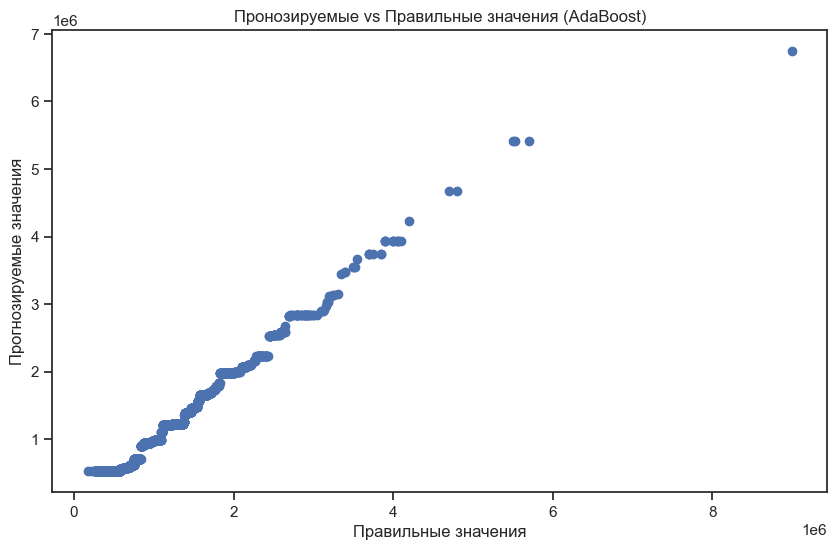

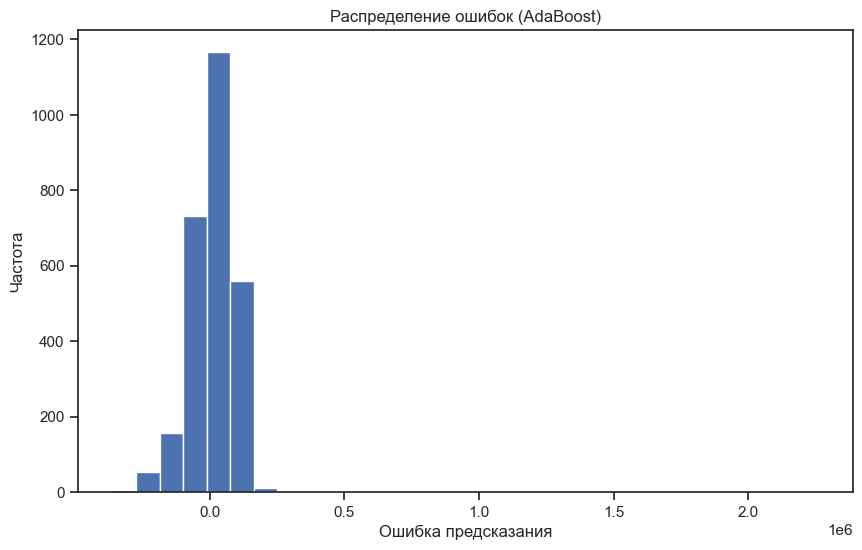

In [291]:
# Предсказания для модели AdaBoost
y_pred_adaboost = adaboost_model.predict(X_test)

# График истинных значений и прогнозных значений для AdaBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_adaboost)
plt.xlabel('Правильные значения')
plt.ylabel('Прогнозируемые значения')
plt.title('Пронозируемые vs Правильные значения (AdaBoost)')
plt.show()

# Гистограмма распределения ошибок прогнозирования для AdaBoost
errors_adaboost = y_test - y_pred_adaboost
plt.figure(figsize=(10, 6))
plt.hist(errors_adaboost, bins=30)
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок (AdaBoost)')
plt.show()


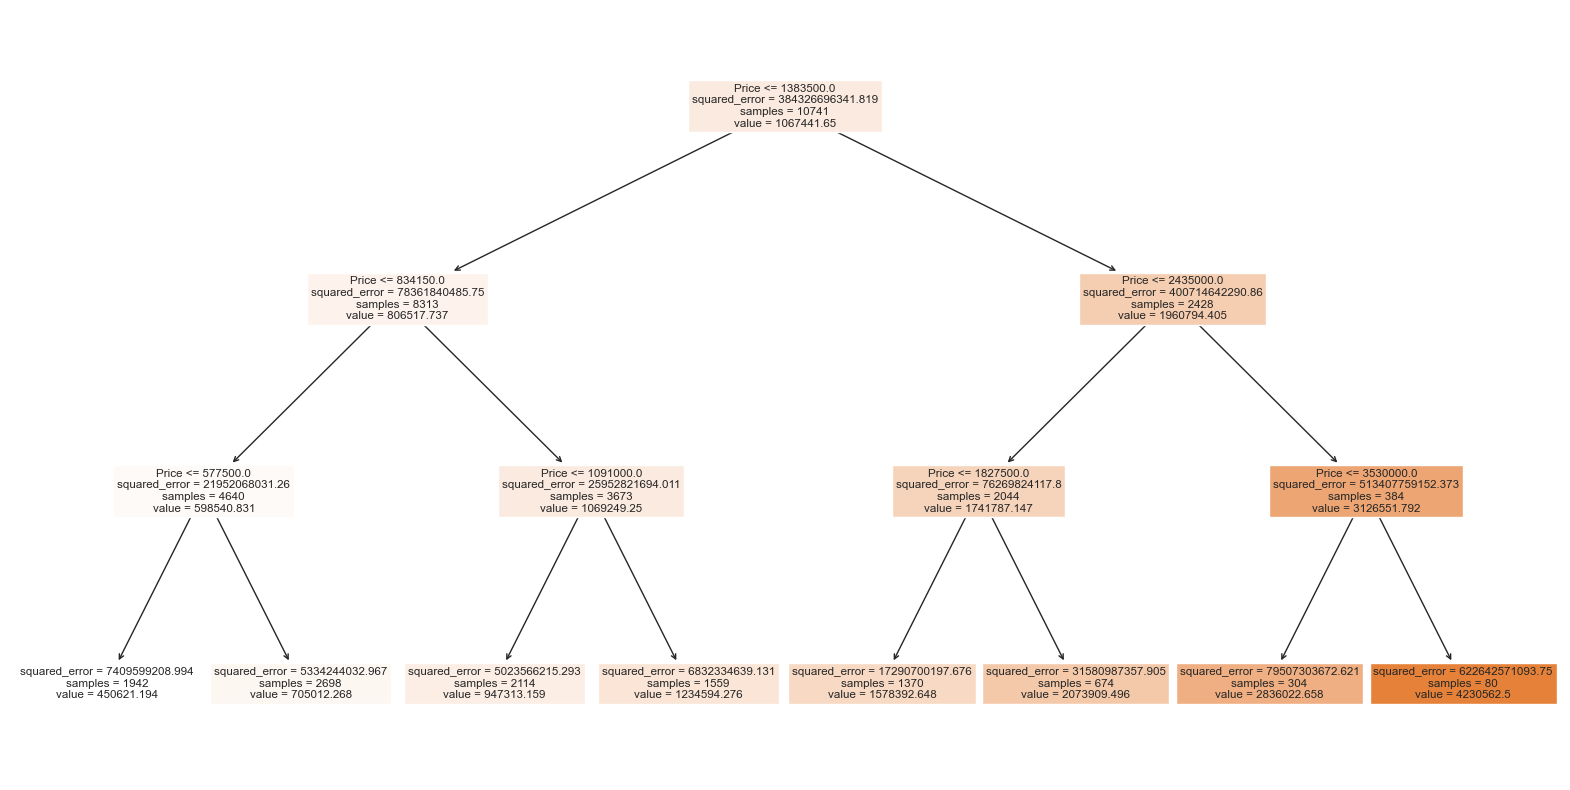

In [292]:
from sklearn.tree import plot_tree

# Получение первого дерева из ансамбля AdaBoost
base_tree = adaboost_model.estimators_[0]

# Визуализация первого дерева
plt.figure(figsize=(20,10))
plot_tree(base_tree, filled=True, feature_names=X.columns)
plt.show()


## Градиентный бустинг

In [293]:
from sklearn.ensemble import GradientBoostingRegressor

# Создание и обучение модели градиентного бустинга
gb_model = GradientBoostingRegressor(n_estimators=300, random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(n_estimators=300, random_state=42)

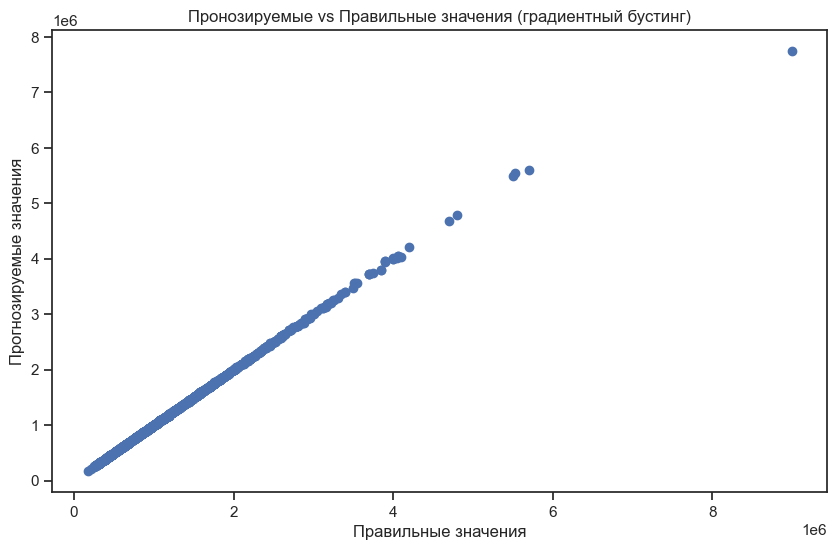

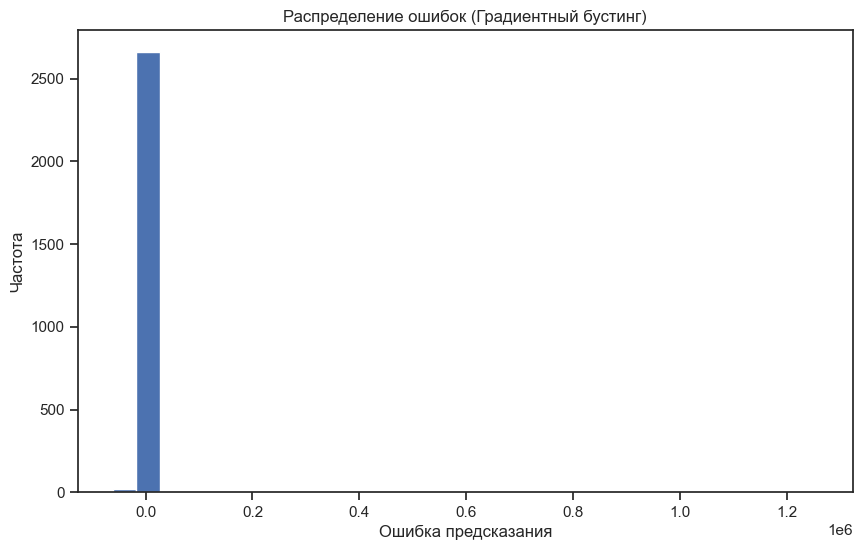

In [294]:
# Предсказания для модели градиентного бустинга
y_pred_gb = gb_model.predict(X_test)

# График истинных значений и прогнозных значений для градиентного бустинга
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb)
plt.xlabel('Правильные значения')
plt.ylabel('Прогнозируемые значения')
plt.title('Пронозируемые vs Правильные значения (градиентный бустинг)')
plt.show()

# Гистограмма распределения ошибок прогнозирования для градиентного бустинга
errors_gb = y_test - y_pred_gb
plt.figure(figsize=(10, 6))
plt.hist(errors_gb, bins=30)
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок (Градиентный бустинг)')
plt.show()


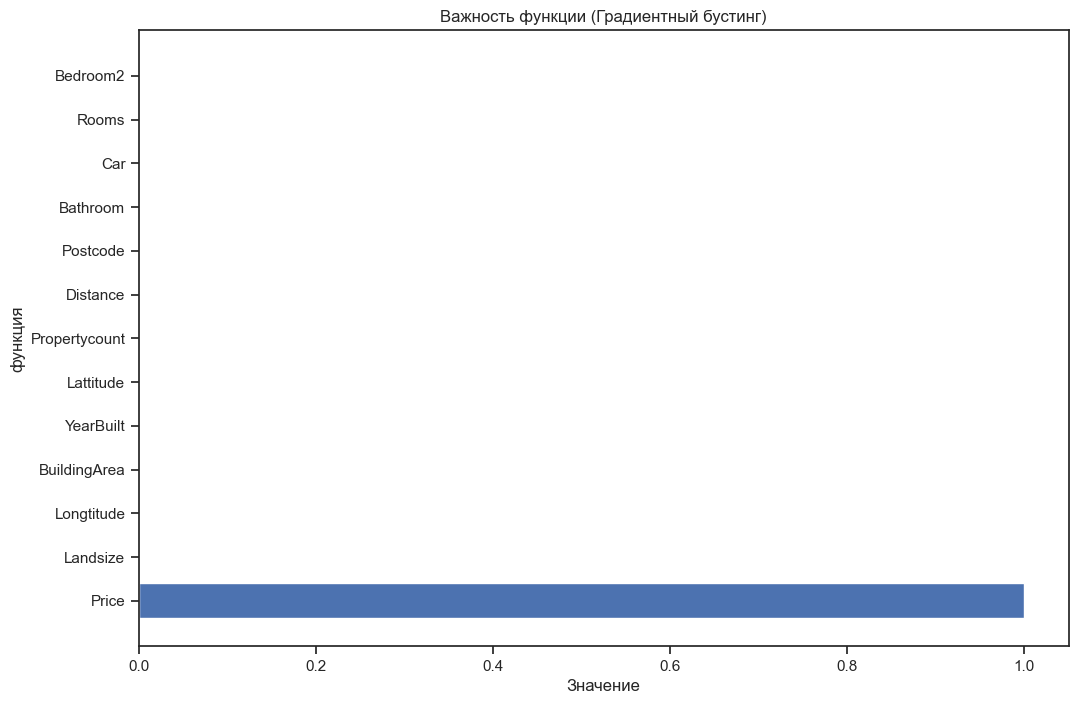

In [295]:
# Получение важности признаков из модели градиентного бустинга
feature_importance = gb_model.feature_importances_

# Создание датафрейма с важностью признаков
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Сортировка признаков по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Значение')
plt.ylabel('функция')
plt.title('Важность функции (Градиентный бустинг)')
plt.show()
